# Product Torus

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import circle_bundles as cb

from ripser import ripser
from persim import plot_diagrams

First, generate a noisy sampling:

In [5]:
r_min, r_max = 0.25, 1.5
r_func = cb.small_to_big(r_min, r_max)

rng = np.random.default_rng(0)

n_samples = 5000
data, base_points, true_fiber_angles, _, _ = cb.sample_C2_torus(
    n_samples,
    r_func=r_func,
    sigma=0.15,              
    rng=rng,
    return_theta=True,
    return_alpha=True,
)

Optionally run the cell below to see an interactive visualization of the dataset and projection map:

In [6]:
app = cb.show_bundle_vis(base_points = base_points, data = data)

Bundle viewer running at: http://127.0.0.1:58756/


Compute a persistence diagram from a sample of the data:

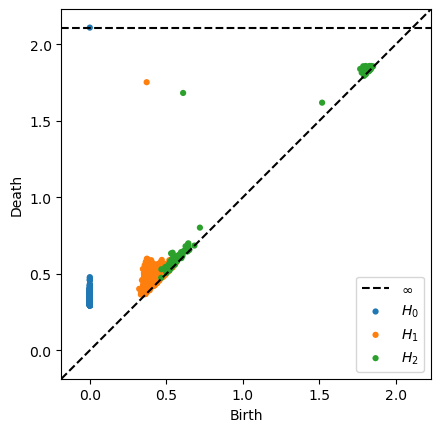

In [7]:
diagrams = ripser(data, maxdim = 2, n_perm = 500)['dgms']
plot_diagrams(diagrams)

Observe that the persistence diagram shows only a single persistence class in dimension 1 (we would expect two for a torus).  This is a result of the large variation in the fiber radius of the underlying model. 

Instead, use a fiberwise approach to detect the global topology. Construct a cover of the base space $\mathbb{S}^{1}$ by open balls around equally-spaced landmarks, then compute local circular coordinates, approximate transition matrices and characteristic classes:

In [ ]:
#Cover construction
n_landmarks = 30
lmk_angs = np.linspace(0, 2*np.pi, n_landmarks, endpoint= False)
landmarks = np.array([np.cos(lmk_angs), np.sin(lmk_angs)]).T
overlap = 1.99
radius = overlap* np.pi/n_landmarks

cover = cb.MetricBallCover(base_points, landmarks, radius, metric = cb.S1UnitVectorMetric())
cover_data = cover.build()

#Bundle computation
bundle = cb.build_bundle(
    data,
    cover,
    show=True,
)

The characteristic classes indicate that the global structure is trivial (as expected), so a global coordinate system is possible. Synchronize local circular coordinates and compute a global toroidal coordinate system:

In [ ]:
global_triv_result = bundle.get_global_trivialization()
fiber_angles = global_triv_result.F 

#Show the correlation between true and assigned fiber coordinates
plt.figure(figsize=(5,5))
plt.scatter(true_fiber_angles, fiber_angles, alpha=0.7)
plt.xlabel("True Fiber Angles")
plt.ylabel("Assigned Fiber Angles")
plt.title("True vs. Assigned Fiber Angles")
plt.grid(True)
plt.show()

Note that the correlation is nearly perfect -- the true and assigned fiber coordinates roughly differ by a global shift of about $0.5$ radians.  

Optionally run the cell below to view an interactive visualization of the dataset colored according to assigned fiber coordinate:

In [ ]:
app = bundle.show_bundle(colors = fiber_angles)